### Purpose:

- taking a video file or a image stack and produce a contour image with intensity information as z axis. 

### To do list:

1. load image in grayscale mode
2. edge detecor --> draw a box
3. calculate the average intensity in every ROI
4. contour plot of the intensity
5. add for loop to run an image stack
6. add unit test to unit function

Grayscale image 
* the value of each pixel is a single sample which carries only intensity information where pixel value varies from 0 to 255
* greyscale images are composed exclusively of shades of gray, varying from black at the weakest intensity to white at the strongest where Pixel can be considered as a every point in an image.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import cv2

> to understand intensity

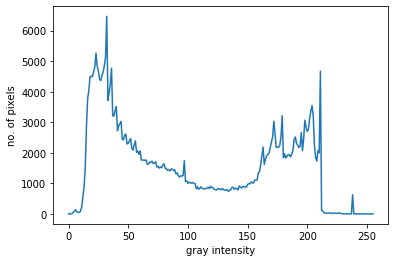

In [44]:
img = cv2.imread('2.png', 0) #load an image in grayscale mode 
cv2.imshow('img', img)
# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[256],[0,256])   
# show the plotting graph of an image 
plt.plot(histr) 
plt.xlabel('gray intensity')
plt.ylabel('no. of pixels')
plt.show() 

> code for running one image & will add for loop to run an image stack

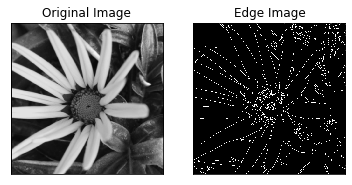

In [41]:
# test out load image and edge detection
img = cv2.imread('2.png', 0) #load an image in grayscale mode 
edges = cv2.Canny(img,50,100) # Canny Edge Detection

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
# test out thresholding and mask
ret, thresh = cv2.threshold(roomimg,0,255,cv2.THRESH_BINARY)

mask = np.zeros(img.shape,np.uint8)
cv2.drawContours(mask,img,0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

mean_val = cv2.mean(img,mask = mask)  
# it should be getting the scalar value of mean intensity

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/drawing.cpp:2515: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


In [47]:
pic = cv2.imread('2.png', 0)
pic = np.full((512,512,3), 12, np.uint8) # add here to get rid of an error

# edge detection
ret, thresh = cv2.threshold(pic,0,255,cv2.THRESH_BINARY)
thresh = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(thresh, 100, 200)
height,width,channels = roomimg.shape
matrix = [] 
column = []


#define the dimensions of the grid (just for testing)
def estimate_noise(I):
    H, W = I.shape
    M = [[1, -2, 1],
        [-2, 4, -2],
       [1, -2, 1]]
    sigma = np.sum(np.sum(np.absolute(scipy.signal.convolve2d(np.array(I), M))))
    sigma = sigma * np.sqrt(0.5 * np.pi) / (6 * (W-2) * (H-2))
    return sigma

boxsize = math.pow(estimate_noise(edge),-1)* 100
box_num = 0

# main function
for i in range (0,height, int(boxsize)):
    for j in range (0,width, int(boxsize)):
        # draw the box of the ROI
        roi_gray = edge[i:i+int(boxsize),j:j+int(boxsize)]
        # find mean intensity of the boxed ROI
        roi_avg_intensity = np.mean(roi_gray)
        
cv2.imwrite('2.png', edge)
plt.imshow(edge, cmap='gray')
plt.show()

ValueError: math domain error